In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
import os
os.getcwd()

'c:\\Users\\Lucas\\OneDrive\\Documents\\Avalia-o-Governo'

In [23]:
df = pd.read_csv('data/Pesquisa Datafolha (Folha de SP 21-03-2024) Avaliação Governos - Pesquisa Datafolha (Folha de SP 21-03-2024) Avaliação Governos.csv')
df

,Governo,Data da pesquisa,Ótimo/Bom,Regular,Ruim/Péssimo,Não sabe
0,Lula 3,em 20/03/2024,35,30,33,2
1,Fernando Collor,de 04 a 06/03/1991,23,40,34,3
2,Itamar Franco,14 e 15/12/1993,18,45,34,3
3,FHC 1,em 15/12/1995,41,40,15,4
4,FHC 2,de 14 a 16/03/2000,18,37,43,2
5,Lula 1,em 01/04/2004,38,43,17,2
6,Lula 2,de 25 a 27/03/2008,55,33,11,1
7,Dilma 1,18 e 19/04/2012,64,29,5,1
8,Dilma 2,17 e 18/03/2016,10,21,69,1
9,Temer,27 e 28/09/2017,5,20,73,2


C:\Users\Lucas\AppData\Local\Temp\ipykernel_16128\940534375.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



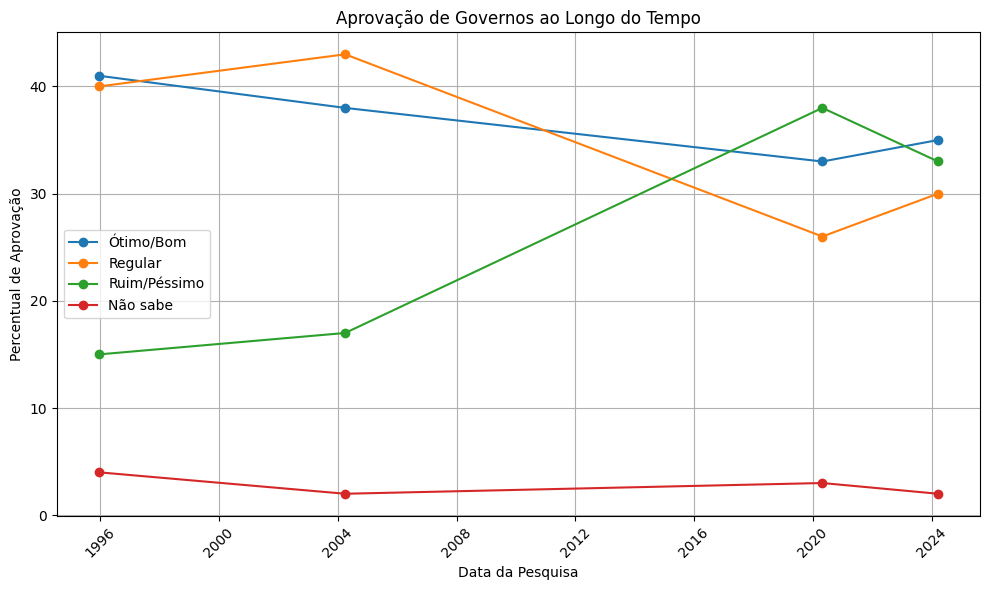

In [13]:
# Convertendo a coluna 'Data da pesquisa' para o tipo datetime
df['Data da pesquisa'] = pd.to_datetime(df['Data da pesquisa'], errors='coerce')

# Ordenando o DataFrame pela data
df.sort_values(by='Data da pesquisa', inplace=True)

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))

# Adicionando as linhas para cada categoria
for coluna in ["Ótimo/Bom", "Regular", "Ruim/Péssimo", "Não sabe"]:
    plt.plot(df['Data da pesquisa'], df[coluna], marker='o', label=coluna)

# Formatando o gráfico
plt.title('Aprovação de Governos ao Longo do Tempo')
plt.xlabel('Data da Pesquisa')
plt.ylabel('Percentual de Aprovação')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16128\572804049.py:21: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



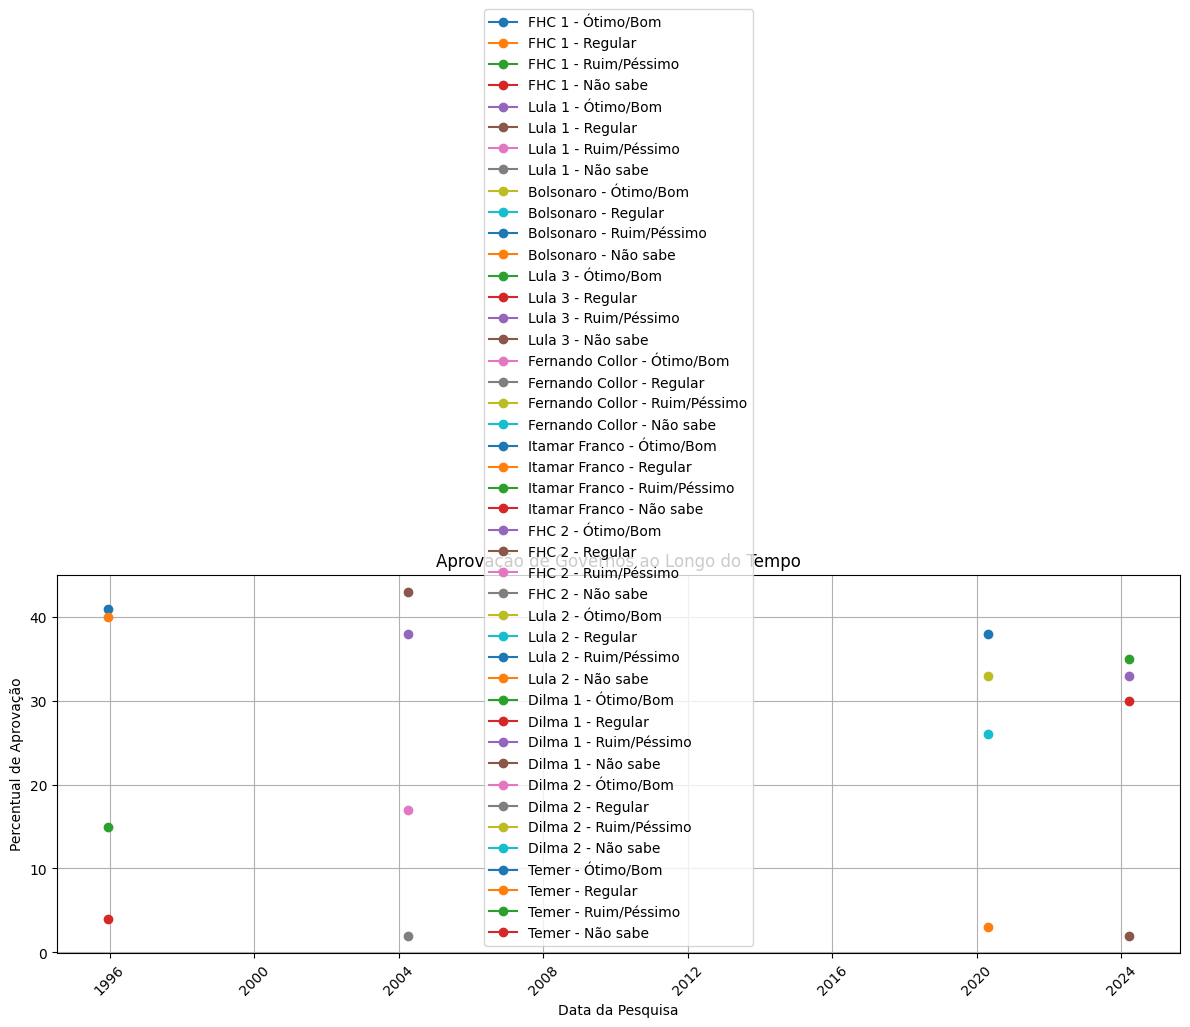

In [14]:
# Converter a coluna 'Data da pesquisa' para o formato datetime
df['Data da pesquisa'] = pd.to_datetime(df['Data da pesquisa'], errors='coerce')

# Ordenar os dados pela data da pesquisa
df = df.sort_values(by='Data da pesquisa')

# Plotar os dados
plt.figure(figsize=(10,6))

for governo in df['Governo'].unique():
    data_governo = df[df['Governo'] == governo]
    plt.plot(data_governo['Data da pesquisa'], data_governo['Ótimo/Bom'], marker='o', label=governo)

plt.title('Avaliação de Governos ao Longo do Tempo')
plt.xlabel('Data da Pesquisa')
plt.ylabel('Avaliação Ótimo/Bom (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
